In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 rows
n_rows = 50
data = {
    'TripID': range(1, n_rows + 1),
    'Route': np.random.choice(['A', 'B', 'C'], n_rows),
    'PassengerCount': np.random.randint(30, 71, n_rows),
    'TripDate': pd.date_range('2025-01-01', periods=n_rows, freq='D').strftime('%Y-%m-%d'),
    'TimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening'], n_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate DurationMin (correlated with PassengerCount)
df['DurationMin'] = df['PassengerCount'] * 0.5 + np.random.normal(5, 2, n_rows)

# Generate Fare (correlated with DurationMin)
df['Fare'] = df['DurationMin'] * 30 + np.random.normal(100, 50, n_rows)

# Round numeric columns
df['DurationMin'] = df['DurationMin'].round()
df['Fare'] = df['Fare'].round().astype(int)

# Save to CSV
df.to_csv('tashkent_trips_large.csv', index=False)
print(df.head(10))

   TripID Route  PassengerCount    TripDate  TimeOfDay  DurationMin  Fare
0       1     C              38  2025-01-01    Evening         21.0   753
1       2     A              55  2025-01-02    Morning         33.0  1085
2       3     C              31  2025-01-03    Evening         21.0   784
3       4     C              49  2025-01-04    Morning         31.0  1002
4       5     A              57  2025-01-05  Afternoon         35.0  1125
5       6     A              36  2025-01-06    Evening         24.0   831
6       7     C              37  2025-01-07  Afternoon         21.0   814
7       8     B              64  2025-01-08    Morning         39.0  1268
8       9     C              43  2025-01-09    Evening         26.0   868
9      10     C              46  2025-01-10    Morning         26.0   926


Missing Values:
TripID            0
Route             0
PassengerCount    0
TripDate          0
TimeOfDay         0
DurationMin       0
Fare              0
dtype: int64

Descriptive Statistics:
         TripID  PassengerCount  DurationMin         Fare
count  50.00000       50.000000    50.000000    50.000000
mean   25.50000       47.820000    28.760000   962.220000
std    14.57738       11.524048     5.475586   175.206967
min     1.00000       30.000000    20.000000   570.000000
25%    13.25000       37.250000    25.000000   827.500000
50%    25.50000       46.500000    28.000000   962.000000
75%    37.75000       55.000000    33.000000  1103.000000
max    50.00000       70.000000    41.000000  1316.000000

Correlation Matrix:
                PassengerCount  DurationMin      Fare
PassengerCount        1.000000     0.937546  0.897099
DurationMin           0.937546     1.000000  0.957645
Fare                  0.897099     0.957645  1.000000


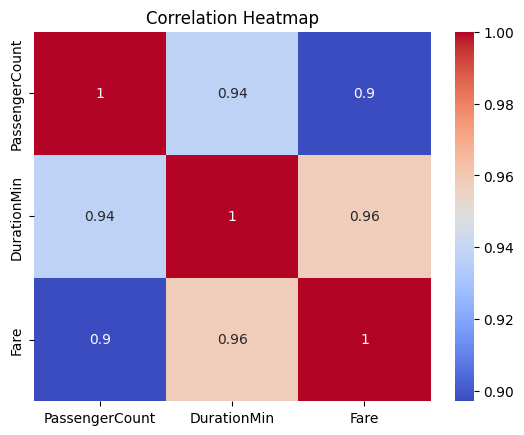

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Correlation matrix
print("\nCorrelation Matrix:")
print(df[['PassengerCount', 'DurationMin', 'Fare']].corr())

# Visualize correlations
sns.heatmap(df[['PassengerCount', 'DurationMin', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Encode categorical variable (TimeOfDay)
df['TimeOfDay_Encoded'] = df['TimeOfDay'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2})

# Create a new feature: HighPassenger (1 if PassengerCount > mean)
df['HighPassenger'] = (df['PassengerCount'] > df['PassengerCount'].mean()).astype(int)

print(df[['TripID', 'TimeOfDay_Encoded', 'HighPassenger']].head())

   TripID  TimeOfDay_Encoded  HighPassenger
0       1                  2              0
1       2                  0              1
2       3                  2              0
3       4                  0              1
4       5                  1              1


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
features = ['PassengerCount', 'Fare', 'TimeOfDay_Encoded', 'HighPassenger']
X = df[features]
y = df['DurationMin']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Calculate loss (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Loss (Mean Squared Error): {mse:.2f}")

# Print coefficients
print("Feature Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Predict for a new trip
new_trip = pd.DataFrame({
    'PassengerCount': [55],
    'Fare': [1100],
    'TimeOfDay_Encoded': [0],  # Morning
    'HighPassenger': [1]
})
predicted_duration = model.predict(new_trip)
print(f"Predicted duration for new trip: {predicted_duration[0]:.2f} minutes")

Loss (Mean Squared Error): 1.00
Feature Coefficients:
PassengerCount: 0.16
Fare: 0.02
TimeOfDay_Encoded: -0.06
HighPassenger: 0.70
Intercept: 2.84
Predicted duration for new trip: 33.06 minutes


Correlation between PassengerCount and DurationMin:
                PassengerCount  DurationMin
PassengerCount        1.000000     0.852971
DurationMin           0.852971     1.000000
Scaled features are valid.
Linear Regression - Test MSE: 4.58, R²: 0.71
Ridge Regression - Test MSE: 4.58, R²: 0.71


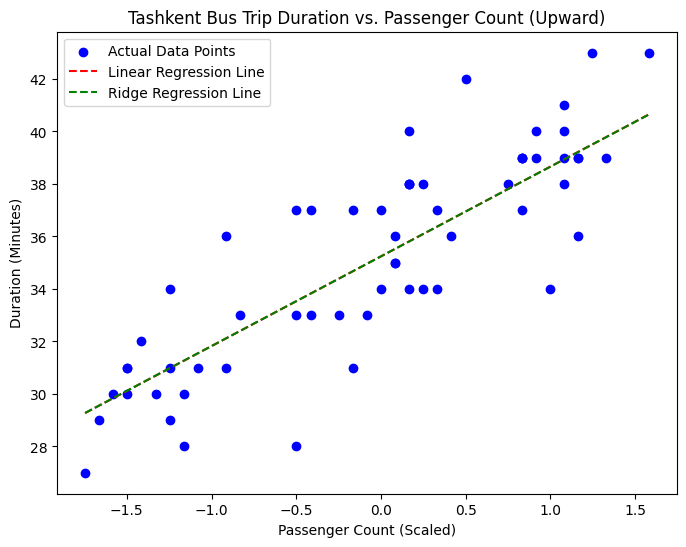

Linear Regression Weights: Intercept=35.24, Coefficient=3.42
Ridge Regression Weights: Intercept=35.24, Coefficient=3.42


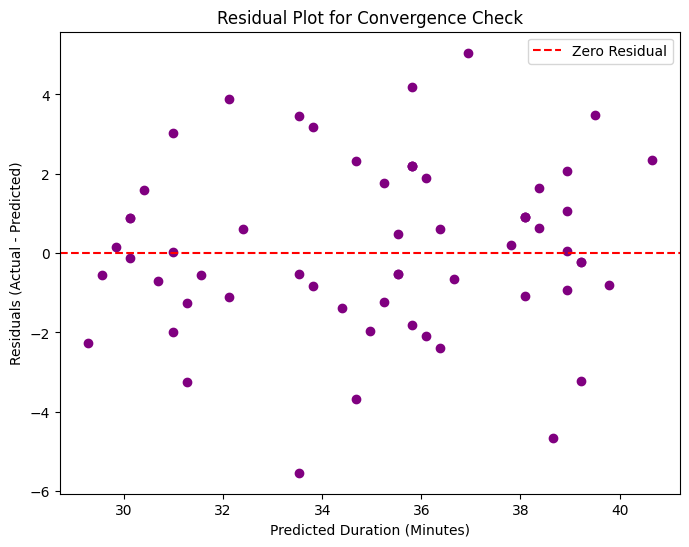

In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Generate dataset with an upward trend
np.random.seed(42)
n_rows = 200  # Increased for stability
data = {
    'TripID': range(1, n_rows + 1),
    'Route': np.random.choice(['A', 'B', 'C'], n_rows),
    'PassengerCount': np.random.randint(30, 71, n_rows),
    'TripDate': pd.date_range('2025-01-01', periods=n_rows, freq='D').strftime('%Y-%m-%d'),
    'TimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening'], n_rows)
}
df = pd.DataFrame(data)

# Adjusted DurationMin for an upward trend with variation
df['DurationMin'] = 20 + (df['PassengerCount'] * 0.3) + np.random.normal(0, 2, n_rows)  # Upward slope, added noise
df['DurationMin'] = df['DurationMin'].round().clip(lower=10, upper=50)  # Constrain range
df['Fare'] = df['DurationMin'] * 25 + np.random.normal(50, 20, n_rows)  # Adjusted fare
df['Fare'] = df['Fare'].round().astype(int)

# Feature engineering and correlation check
df['TimeOfDay_Encoded'] = df['TimeOfDay'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2})
print("Correlation between PassengerCount and DurationMin:")
print(df[['PassengerCount', 'DurationMin']].corr())  # Should show positive correlation

features = ['PassengerCount']
X = df[features]
y = df['DurationMin']

# Scale features and check for NaN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    print("Warning: NaN or Inf values detected in scaled features. Check data.")
else:
    print("Scaled features are valid.")

# Train and split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Standard Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Ridge Regression for stability
ridge_model = Ridge(alpha=0.1)  # Light regularization
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_test_pred = model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
ridge_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_r2 = r2_score(y_test, y_test_pred_ridge)

print(f"Linear Regression - Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")
print(f"Ridge Regression - Test MSE: {ridge_mse:.2f}, R²: {ridge_r2:.2f}")

# Visualize
sorted_indices = np.argsort(X_test[:, 0])
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Data Points')
plt.plot(X_test[sorted_indices, 0], y_test_pred[sorted_indices], color='red', label='Linear Regression Line', linestyle='--')
plt.plot(X_test[sorted_indices, 0], y_test_pred_ridge[sorted_indices], color='green', label='Ridge Regression Line', linestyle='--')
plt.xlabel('Passenger Count (Scaled)')
plt.ylabel('Duration (Minutes)')
plt.title('Tashkent Bus Trip Duration vs. Passenger Count (Upward)')
plt.legend()
plt.show()

# Print weights and residual check
print(f"Linear Regression Weights: Intercept={model.intercept_:.2f}, Coefficient={model.coef_[0]:.2f}")
print(f"Ridge Regression Weights: Intercept={ridge_model.intercept_:.2f}, Coefficient={ridge_model.coef_[0]:.2f}")

residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Predicted Duration (Minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Convergence Check')
plt.legend()
plt.show()